## Functions

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_up(data):
    data = data.rename(columns=lambda x: x.strip())             # strip the spaces in the headers
    
    #data.loc[data['Gender'] == 'F', 'Gender'] = 0         # these values are stored as ints
    #data.loc[data['Gender'] == 'M', 'Gender'] = 1

    data.loc[data['Location'] == 'U', 'Location'] = 0
    data.loc[data['Location'] == 'R', 'Location'] = 1

    data.loc[data['famsize'] == 'LE3', 'famsize'] = 0
    data.loc[data['famsize'] == 'GT3', 'famsize'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0
    data.loc[data['Pstatus'] == 'T', 'Pstatus'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0

    data.loc[data['schoolsup'] == 'no', 'schoolsup'] = 0
    data.loc[data['schoolsup'] == 'yes', 'schoolsup'] = 1

    data.loc[data['famsup'] == 'no', 'famsup'] = 0
    data.loc[data['famsup'] == 'yes', 'famsup'] = 1

    data.loc[data['paid'] == 'no', 'paid'] = 0
    data.loc[data['paid'] == 'yes', 'paid'] = 1

    data.loc[data['activities'] == 'no', 'activities'] = 0
    data.loc[data['activities'] == 'yes', 'activities'] = 1

    data.loc[data['nursery'] == 'no', 'nursery'] = 0
    data.loc[data['nursery'] == 'yes', 'nursery'] = 1

    data.loc[data['higher'] == 'no', 'higher'] = 0
    data.loc[data['higher'] == 'yes', 'higher'] = 1

    data.loc[data['internet'] == 'no', 'internet'] = 0
    data.loc[data['internet'] == 'yes', 'internet'] = 1
    
    values = ['MOM_None','MOM_Prim','MOM_JS','MOM_Ss','MOM_Tert']
    
    data.loc[data['Medu'] == 0, 'Medu'] = 'MOM_None'
    data.loc[data['Medu'] == 1, 'Medu'] = 'MOM_Prim'
    data.loc[data['Medu'] == 2, 'Medu'] = 'MOM_JS'
    data.loc[data['Medu'] == 3, 'Medu'] = 'MOM_Ss'
    data.loc[data['Medu'] == 4, 'Medu'] = 'MOM_Tert'
    mum_dummies = pd.get_dummies(data['Medu'])
    mum_dummies = mum_dummies.T.reindex(values).T.fillna(0)    # to fill missing values with zeros for any missing category
    
    data = data.join(mum_dummies)
    data = data.drop(['Medu'], axis=1)
    
    values = ['Dad_None','Dad_Prim','Dad_JS','Dad_Ss','Dad_Tert']
    
    data.loc[data['Fedu'] == 0, 'Fedu'] = 'Dad_None'
    data.loc[data['Fedu'] == 1, 'Fedu'] = 'Dad_Prim'
    data.loc[data['Fedu'] == 2, 'Fedu'] = 'Dad_JS'
    data.loc[data['Fedu'] == 3, 'Fedu'] = 'Dad_Ss'
    data.loc[data['Fedu'] == 4, 'Fedu'] = 'Dad_Tert'
    dad_dummies = pd.get_dummies(data['Fedu'])
    dad_dummies = dad_dummies.T.reindex(values).T.fillna(0)   # to fill missing values with zeros for any missing category
    
    data = pd.concat([data, dad_dummies], axis=1)
    data = data.drop(['Fedu'], axis=1)
    
    SN = data['S/N']

    data = data.drop(['S/N'], axis=1)
    
    return data, SN

## Data Cleanup and Exploration

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('Train.csv', encoding='utf8', delimiter=',', delim_whitespace=False)
data = data.drop('Gender', axis=1)

In [67]:
data.head()

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,13,U,GT3,A,4,4,2,2,0,...,no,no,yes,yes,no,4,3,3,4,22
1,2,12,U,GT3,T,1,1,1,2,0,...,no,no,no,yes,yes,5,3,3,2,31
2,3,10,U,LE3,T,1,1,1,2,0,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,10,U,GT3,T,4,2,1,3,0,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,11,U,GT3,T,3,3,1,2,0,...,no,no,yes,yes,no,4,3,5,0,37


Now we need to transform the data to numerical variables from categorical variables

In [68]:
data, SN= clean_up(data)
data.head()

,Age,Location,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,...,MOM_None,MOM_Prim,MOM_JS,MOM_Ss,MOM_Tert,Dad_None,Dad_Prim,Dad_JS,Dad_Ss,Dad_Tert
0,13,0,1,0,2,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,12,0,1,1,1,2,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,10,0,0,1,1,2,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,10,0,1,1,1,3,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,11,0,1,1,1,2,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [69]:
data.iloc[:10,:15]

,Age,Location,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel
0,13,0,1,0,2,2,0,1,0,0,0,1,1,0,4
1,12,0,1,1,1,2,0,0,1,0,0,0,1,1,5
2,10,0,0,1,1,2,0,1,0,0,0,1,1,1,4
3,10,0,1,1,1,3,0,0,1,0,1,1,1,1,3
4,11,0,1,1,1,2,0,0,1,0,0,1,1,0,4
5,11,0,0,1,1,2,0,0,1,0,1,1,1,1,5
6,11,0,0,1,1,2,0,0,0,0,0,1,1,1,4
7,12,0,1,0,2,2,0,1,1,0,0,1,1,0,4
8,10,0,0,0,1,2,0,0,1,0,0,1,1,1,4
9,10,0,1,1,1,2,0,0,1,0,1,1,1,1,5


In [70]:
data.iloc[:10,15:]

,freetime,health,absences,Score,MOM_None,MOM_Prim,MOM_JS,MOM_Ss,MOM_Tert,Dad_None,Dad_Prim,Dad_JS,Dad_Ss,Dad_Tert
0,3,3,4,22,0,0,0,0,1,0,0,0,0,1
1,3,3,2,31,0,1,0,0,0,0,1,0,0,0
2,3,3,6,37,0,1,0,0,0,0,1,0,0,0
3,2,5,0,42,0,0,0,0,1,0,0,1,0,0
4,3,5,0,37,0,0,0,1,0,0,0,0,1,0
5,4,5,6,37,0,0,0,0,1,0,0,0,1,0
6,4,3,0,38,0,0,1,0,0,0,0,1,0,0
7,1,1,2,36,0,0,0,0,1,0,0,0,0,1
8,2,1,0,48,0,0,0,1,0,0,0,1,0,0
9,5,5,0,37,0,0,0,1,0,0,0,0,0,1


## Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_data, cv_data = train_test_split(data, test_size=0.3, random_state=42)

train_y = train_data['Score']
cv_y = cv_data['Score']

train_X = train_data.drop(['Score'], axis=1)
cv_X = cv_data.drop(['Score'], axis=1)

In [72]:
alphas = [0, 0.1, 0.3, 1, 3, 10, 20, 30, 100, 300]
J_cv = []
J_train = []
r2_cv = []
r2_train = []

for alp in alphas:

    reg = linear_model.Ridge(alpha = alp)
    reg.fit(train_X, train_y)

    cv_preds = reg.predict(cv_X)
    train_preds = reg.predict(train_X)

    m_train = len(train_y)
    m_cv = len(cv_y)

    J_cv.append(mean_squared_error(cv_y.values, cv_preds))
    J_train.append(mean_squared_error(train_y.values, train_preds))
    
    r2_cv.append(r2_score(cv_y.values, cv_preds))
    r2_train.append(r2_score(train_y.values, train_preds))

C:\Users\EshamogboOjuba\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0660681740595384e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


[44.684661034167696, 44.409657476596593, 43.984136865655671, 43.128977652574271, 42.155510455763377, 41.256219515296827, 41.240779258299725, 41.583455979148184, 44.450563244119863, 48.559932811278237]


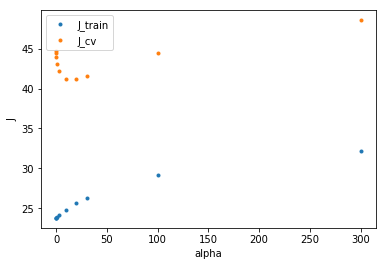

In [73]:
plt.plot(alphas, J_train, label='J_train', marker='.', linestyle='none')
plt.plot(alphas, J_cv, label='J_cv', marker='.', linestyle='none')
plt.xlabel('alpha')
plt.ylabel('J')
plt.legend()

print(J_cv)

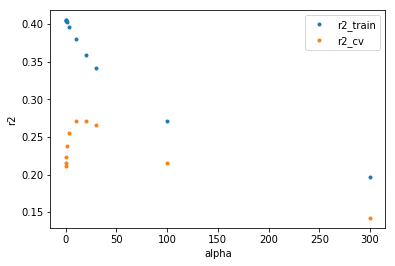

In [74]:
plt.plot(alphas, r2_train, label='r2_train', marker='.', linestyle='none')
plt.plot(alphas, r2_cv, label='r2_cv', marker='.', linestyle='none')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend()

max_alpha = np.array(r2_cv).argmax()

## Submission

In [75]:
submission_data = pd.read_csv('Test.csv', encoding='utf8', delimiter=',', delim_whitespace=False)
submission_data, SN = clean_up(submission_data)
#submission_data = submission_data.drop('reason', axis=1)
submission_data.head()

submission_data.iloc[:10,:15]

,Age,Location,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel
0,12,0,0,0,1,1,0,0,0,0,0,1,1,1,4
1,13,1,0,1,2,4,0,0,1,0,1,1,1,0,5
2,13,0,1,1,2,2,0,1,0,0,1,1,1,1,5
3,12,0,1,1,1,2,0,0,1,0,0,0,1,1,5
4,13,0,1,1,2,2,0,0,0,0,1,1,1,1,4
5,12,0,1,1,1,2,0,0,0,0,0,0,1,1,4
6,13,0,1,1,1,3,0,0,1,0,0,1,1,1,4
7,12,0,1,1,1,3,0,0,1,0,0,1,1,1,4
8,13,0,1,1,1,3,0,0,0,0,1,1,1,1,4
9,13,0,0,0,1,2,0,0,1,0,1,1,1,1,5


In [76]:
submission_data.iloc[:10,15:]

,freetime,health,absences,MOM_None,MOM_Prim,MOM_JS,MOM_Ss,MOM_Tert,Dad_None,Dad_Prim,Dad_JS,Dad_Ss,Dad_Tert
0,4,3,18,0,0,0,1,0,0,0,1,0,0
1,2,3,2,0,1,0,0,0,0,1,0,0,0
2,4,4,0,0,1,0,0,0,0,1,0,0,0
3,4,5,12,0,0,1,0,0,0,0,1,0,0
4,3,5,10,0,0,1,0,0,0,1,0,0,0
5,3,4,0,0,1,0,0,0,0,1,0,0,0
6,3,2,0,0,0,1,0,0,0,0,1,0,0
7,3,3,0,0,1,0,0,0,0,1,0,0,0
8,2,2,0,0,0,1,0,0,0,1,0,0,0
9,4,2,0,0,0,0,0,1,0,0,0,0,1


In [77]:
reg_submit = linear_model.Ridge(alpha = max_alpha)
reg_submit.fit(train_X, train_y)
submissions=reg_submit.predict(submission_data)

In [78]:
d = {'S/N': SN, 'Score': pd.Series(submissions)}

In [79]:
submission_df = pd.DataFrame(d)
submission_df.to_csv('Submission.csv', index=False)